In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [2]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(),0,1)

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_ind
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [5]:
remove_features = ['PassengerId', 'Name','Ticket','Embarked','Cabin']

In [6]:
titanic.drop(remove_features, axis = 1, inplace = True)


In [7]:
gender_update ={'male' :0, 'female':1}
titanic['Sex'] = titanic['Sex'].map(gender_update)

In [8]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_ind
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,0


In [9]:
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_ind
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.228956
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.420397
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,0.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000


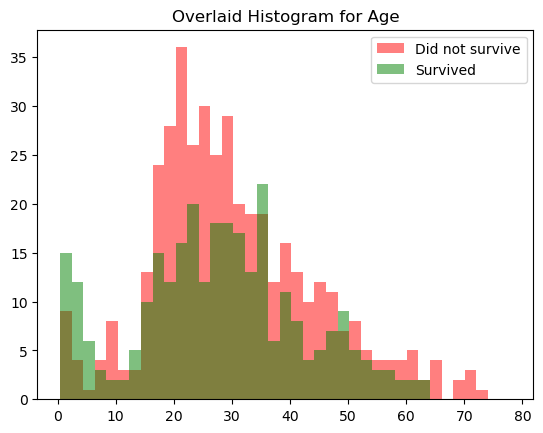

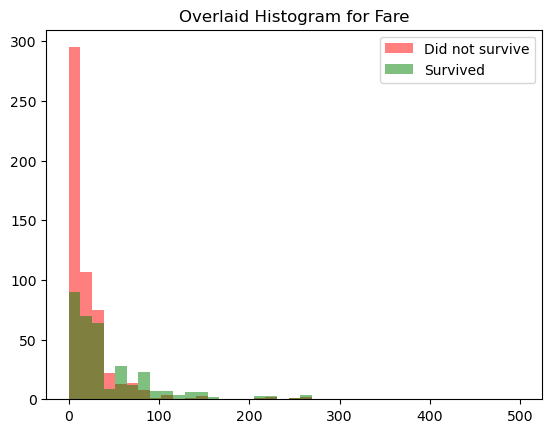

In [10]:
for i in ['Age','Fare']:
    died = list(titanic[titanic['Survived'] == 0][i].dropna())
    survived = list(titanic[titanic['Survived'] == 1][i].dropna())
    xmin = min(min(died),min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    plt.hist(died,color = 'r', alpha=0.5,bins = np.arange(xmin,xmax,width), label='Did not survive')
    plt.hist(survived, alpha=0.5,color = 'g',bins = np.arange(xmin,xmax,width), label='Survived')
    plt.legend()
    plt.title('Overlaid Histogram for {}'.format(i))
    plt.show()

<Figure size 640x480 with 0 Axes>

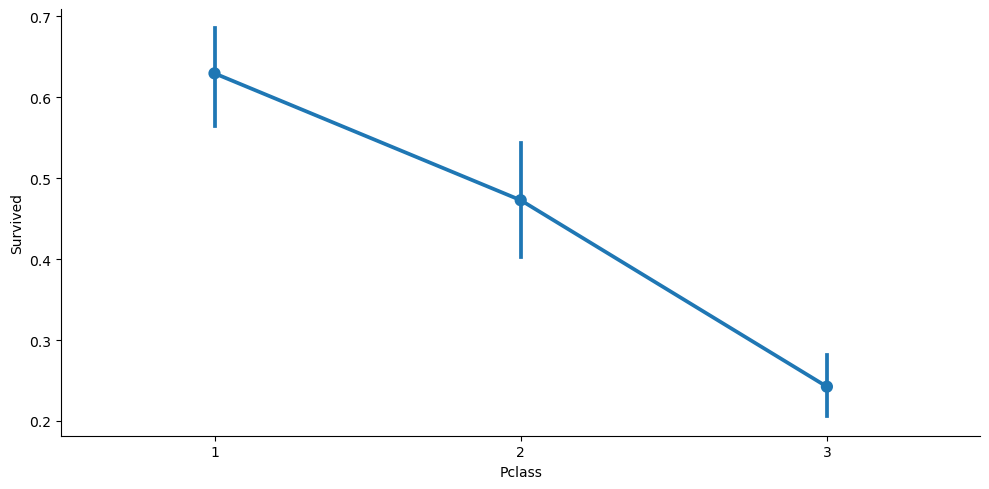

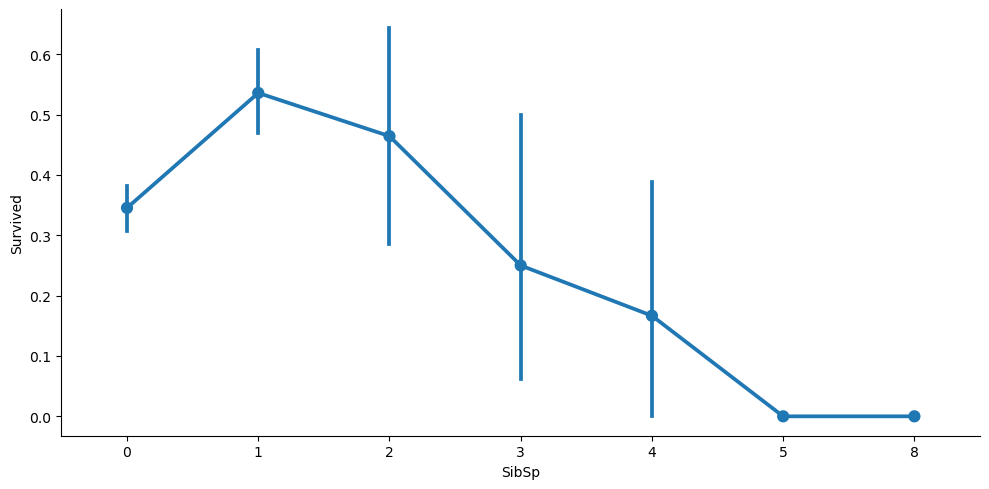

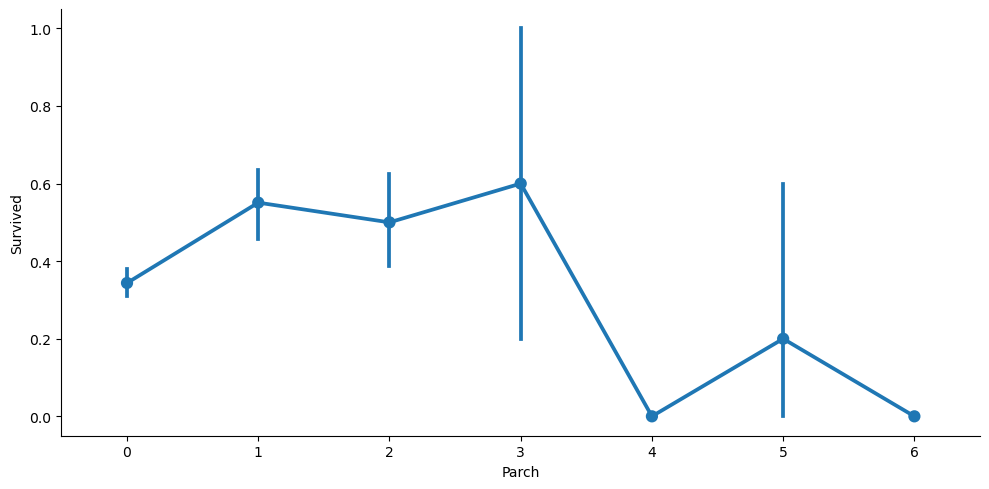

In [11]:
for i,col in enumerate(['Pclass','SibSp','Parch']):
    plt.figure(i)
    sns.catplot(x =col,y = 'Survived', data = titanic,kind = 'point',aspect = 2,)

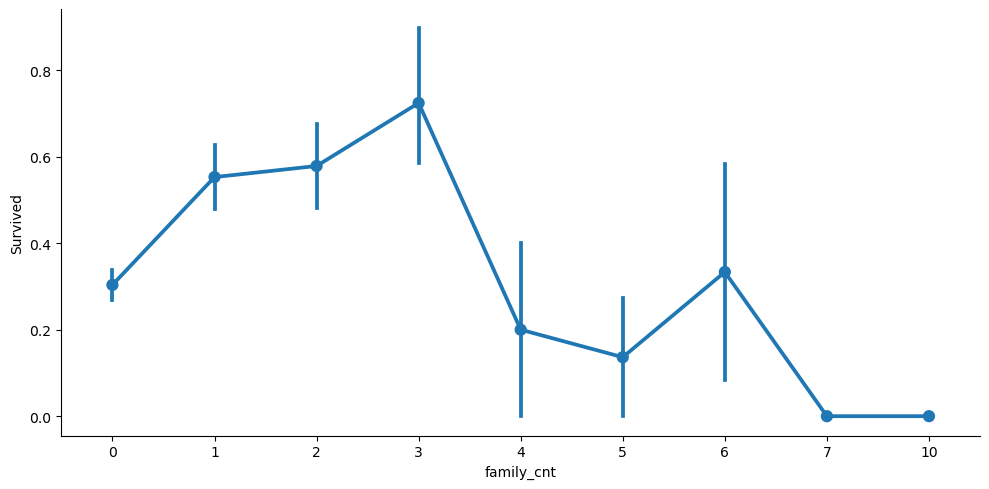

In [12]:
titanic['family_cnt'] = titanic['Parch'] + titanic['SibSp']
sns.catplot(x = 'family_cnt',y = 'Survived', data = titanic,kind = 'point',aspect = 2,)

In [13]:
titanic['family_cnt'] = titanic['SibSp']+ titanic['Parch']
titanic.drop(['SibSp','Parch'],axis =1 , inplace = True)

In [14]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Cabin_ind,family_cnt
0,0,3,0,22.0,7.2500,0,1
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [15]:
titanic.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
Fare            0
Cabin_ind       0
family_cnt      0
dtype: int64

In [16]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace = True)

In [17]:
features = titanic.drop('Survived',axis = 1)
labels = titanic['Survived'] 

#featurs are X values
#labels = output values

In [18]:
X_train, X_test,y_train, y_test = train_test_split(features,labels,test_size = 0.4,random_state = 42)
#40% for test 
X_test, X_val,y_test, y_val = train_test_split(X_test,y_test,test_size = 0.5,random_state = 42)
#Split the test set in 2 halves. 

In [19]:
X_train.to_csv('train_features.csv',index = False)
X_test.to_csv('test_features.csv',index = False)
X_val.to_csv('val_features.csv',index = False)


y_train.to_csv('train_labels.csv',index = False)
y_test.to_csv('test_labels.csv',index = False)
y_val.to_csv('val_labels.csv',index = False)

In [20]:
tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')


In [21]:
print("Number of samples in tr_features:", tr_features.shape[0])
print("Number of samples in tr_labels:", tr_labels.shape[0])


Number of samples in tr_features: 534
Number of samples in tr_labels: 534


In [22]:
tr_labels

,Survived
0,1
1,0
2,1
3,0
4,1
...,...
529,1
530,0
531,0
532,1


In [23]:
tr_features

,Pclass,Sex,Age,Fare,Cabin_ind,family_cnt
0,2,0,62.000000,10.5000,0,0
1,3,0,8.000000,29.1250,0,5
2,3,0,32.000000,56.4958,0,0
3,3,1,20.000000,9.8250,0,1
4,2,1,28.000000,13.0000,0,0
...,...,...,...,...,...,...
529,3,1,21.000000,7.6500,0,0
530,1,0,29.699118,31.0000,0,0
531,3,0,41.000000,14.1083,0,2
532,1,1,14.000000,120.0000,1,3


In [24]:
rf = RandomForestClassifier()

scores = cross_val_score(rf,tr_features,tr_labels.values.ravel(), cv =5)

In [25]:
scores

array([0.81308411, 0.80373832, 0.79439252, 0.79439252, 0.82075472])

In [26]:
rf1 = RandomForestClassifier(n_estimators = 5, max_depth = 10 )
rf1.fit(tr_features,tr_labels.values.ravel())

RandomForestClassifier(max_depth=10, n_estimators=5)

In [27]:
rf2 = RandomForestClassifier(n_estimators = 100, max_depth = 10 )
rf2.fit(tr_features,tr_labels.values.ravel())

RandomForestClassifier(max_depth=10)

In [28]:
rf3 = RandomForestClassifier(n_estimators = 100, max_depth = None)
rf3.fit(tr_features,tr_labels.values.ravel())

RandomForestClassifier()

In [29]:
val_features = pd.read_csv('val_features.csv')
val_labels = pd.read_csv('val_labels.csv')

te_features = pd.read_csv('test_features.csv')
te_labels = pd.read_csv('test_labels.csv')

In [30]:
for mdl in [rf1, rf2, rf3]:
    y_pred = mdl.predict(val_features)
    accuracy = round(accuracy_score(val_labels, y_pred), 2)
    precision = round(precision_score(val_labels, y_pred), 2)
    recall = round(recall_score(val_labels, y_pred), 2)
    print('MAX DEPTH: {} / # OF EST: {} -- Accuracy: {} / Precision: {} / Recall: {}'.format(mdl.max_depth,
                                                                         mdl.n_estimators,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

MAX DEPTH: 10 / # OF EST: 5 -- Accuracy: 0.81 / Precision: 0.85 / Recall: 0.67
MAX DEPTH: 10 / # OF EST: 100 -- Accuracy: 0.82 / Precision: 0.83 / Recall: 0.72
MAX DEPTH: None / # OF EST: 100 -- Accuracy: 0.82 / Precision: 0.82 / Recall: 0.72


# FINAL MODEL

In [32]:
y_pred = rf2.predict(val_features)
accuracy = round(accuracy_score(val_labels, y_pred), 2)
precision = round(precision_score(val_labels, y_pred), 2)
recall = round(recall_score(val_labels, y_pred), 2)
print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(rf2.max_depth,
                                                                     rf2.n_estimators,
                                                                     accuracy,
                                                                     precision,
                                                                     recall))

MAX DEPTH: 10 / # OF EST: 100 -- A: 0.82 / P: 0.83 / R: 0.72
